Group 2: June to October

Andhra Pradesh, Bihar, Gujarat, Maharashtra, Telangana, Uttar Pradesh

In [29]:
import pandas as pd
import plotly.graph_objects as go

states = ['Andhra Pradesh' , 'Bihar', 'Gujarat', 'Maharashtra', 'Telangana', 'Uttar Pradesh']

for st in states:
    df = pd.read_csv('../states/'+ st+'.csv')
    districts = sorted(df['District'].unique())
    print(st)
    print(districts)
    fig = go.Figure()

    # Read the dataset and add traces
    for i in districts:
        data = pd.read_csv('../districts/'+i+'.csv',parse_dates= True)
        data = data.sort_values(by="Date", ascending=True)
        yearly_sum = data.groupby('Year')['Avg_rainfall'].sum()
        fig.add_trace(go.Scatter(x=yearly_sum.index, y=yearly_sum.values, mode='lines+markers', name=i, visible='legendonly'))
    

    years = list(range(int(min(yearly_sum.index)), int(max(yearly_sum.index)) + 1, 1))  # Adjust the range and step as needed1
    fig.update_xaxes(tickmode='array', tickvals=years, ticktext=years)

    # Update layout
    fig.update_layout(
        title=st,
        xaxis=dict(title='Year', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(title='Average Rainfall in mm', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        legend=dict(x=1.05, y=1, traceorder='normal'),
        margin=dict(l=0, r=0, t=50, b=0),
        plot_bgcolor='white'
    )
    fig.update_layout(
        legend=dict(
            tracegroupgap=0,
        ),
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(label="All",
                        method="update",
                        args=[{"visible": [True] * len(districts)},
                            {"title": "All Districts"}]),
                    dict(label="None",
                        method="update",
                        args=[{"visible": [False] * len(districts)},
                            {"title": "No District"}])
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.05,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    def create_legend_callback(index):
        def callback(trace, points, selector):
            for i in range(len(fig.data)):
                if i == index:
                    fig.data[i].visible = True
                else:
                    fig.data[i].visible = False
        return callback

    for i, _ in enumerate(fig.data):
        fig.data[i].on_click(create_legend_callback(i))



    fig.show()


Andhra Pradesh
['Anantapur', 'Chittoor', 'East Godavari', 'Guntur', 'Krishna', 'Kurnool', 'Prakasam', 'SPSR Nellore', 'Srikakulam', 'Visakhapatanam', 'Vizianagaram', 'West Godavari', 'Y.S.R.']


Bihar
['Araria', 'Arwal', 'Aurangabad', 'Banka', 'Begusarai', 'Bhagalpur', 'Bhojpur', 'Buxar', 'Darbhanga', 'Gaya', 'Gopalganj', 'Jamui', 'Jehanabad', 'Kaimur (Bhabua)', 'Katihar', 'Khagaria', 'Kishanganj', 'Lakhisarai', 'Madhepura', 'Madhubani', 'Munger', 'Muzaffarpur', 'Nalanda', 'Nawada', 'Pashchim Champaran', 'Patna', 'Purbi Champaran', 'Purnia', 'Rohtas', 'Saharsa', 'Samastipur', 'Saran', 'Sheikhpura', 'Sheohar', 'Sitamarhi', 'Siwan', 'Supaul', 'Vaishali']


Gujarat
['Ahmadabad', 'Amreli', 'Anand', 'Arvalli', 'Banas Kantha', 'Bharuch', 'Bhavnagar', 'Botad', 'Chhotaudepur', 'Dang', 'Devbhumi Dwarka', 'Dohad', 'Gandhinagar', 'Gir Somnath', 'Jamnagar', 'Junagadh', 'Kachchh', 'Kheda', 'Mahesana', 'Mahisagar', 'Morbi', 'Narmada', 'Navsari', 'Panch Mahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabar Kantha', 'Surat', 'Surendranagar', 'Tapi', 'Vadodara', 'Valsad']


Maharashtra
['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed', 'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli', 'Gondia', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur', 'Mumbai Suburban', 'Nagpur', 'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Palghar', 'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli', 'Satara', 'Sindhudurg', 'Solapur', 'Thane', 'Wardha', 'Washim', 'Yavatmal']


Telangana
['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagitial', 'Jangoan', 'Jayashankar Bhupalapally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Kumuram Bheem Asifabad', 'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak', 'Medchal Malkajgiri', 'Mulugu', 'Nagarkurnool', 'Nalgonda', 'Narayanpet', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Ranga Reddy', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal Rural', 'Warangal Urban', 'Yadadri Bhuvanagiri']


Uttar Pradesh
['Agra', 'Aligarh', 'Ambedkar Nagar', 'Amethi', 'Amroha', 'Auraiya', 'Ayodhya', 'Azamgarh', 'Baghpat', 'Bahraich', 'Ballia', 'Balrampur', 'Banda', 'Barabanki', 'Bareilly', 'Basti', 'Bhadohi', 'Bijnor', 'Budaun', 'Bulandshahr', 'Chandauli', 'Chitrakoot', 'Deoria', 'Etah', 'Etawah', 'Farrukhabad', 'Fatehpur', 'Firozabad', 'Gautam Buddha Nagar', 'Ghaziabad', 'Ghazipur', 'Gonda', 'Gorakhpur', 'Hamirpur', 'Hapur', 'Hardoi', 'Hathras', 'Jalaun', 'Jaunpur', 'Jhansi', 'Kannauj', 'Kanpur Dehat', 'Kanpur Nagar', 'Kasganj', 'Kaushambi', 'Kheri', 'Kushi Nagar', 'Lalitpur', 'Lucknow', 'Maharajganj', 'Mahoba', 'Mainpuri', 'Mathura', 'Mau', 'Meerut', 'Mirzapur', 'Moradabad', 'Muzaffarnagar', 'Pilibhit', 'Pratapgarh', 'Prayagraj', 'Rae Bareli', 'Rampur', 'Saharanpur', 'Sambhal', 'Sant Kabeer Nagar', 'Shahjahanpur', 'Shamli', 'Shravasti', 'Siddharth Nagar', 'Sitapur', 'Sonbhadra', 'Sultanpur', 'Unnao', 'Varanasi']


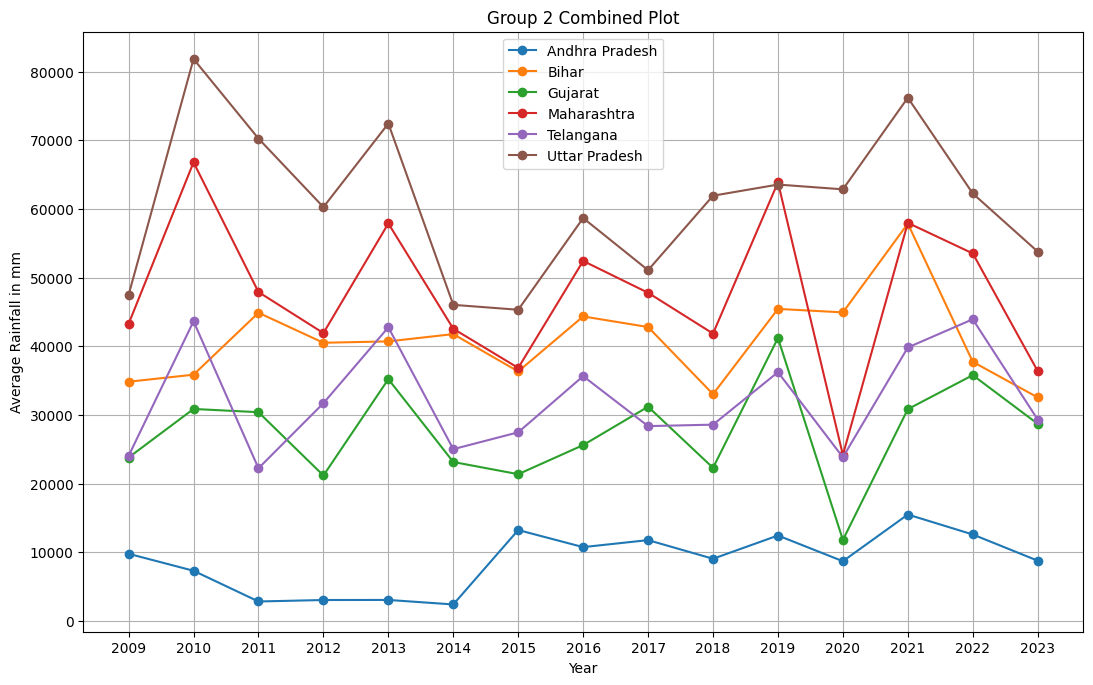

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6), dpi = 100)
ax = fig.add_axes([0,0,1,1])

states = ['Andhra Pradesh' , 'Bihar', 'Gujarat', 'Maharashtra', 'Telangana', 'Uttar Pradesh']
# Read the dataset
for i in states:
    data = pd.read_csv('../states_cumulative/'+i+'.csv',parse_dates= True)
    data = data.sort_values(by="Date", ascending=True)
    yearly_sum = data.groupby('Year')['Average'].sum()
    plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-', label = i)
    plt.xticks(yearly_sum.index)

ax.set_xlabel('Year')
ax.set_ylabel('Average Rainfall in mm')
ax.grid(True)
ax.set_title('Group 2 Combined Plot')
ax.legend()


